# Proyecto Datos Pokémon

En este proyecto se realizará un análisis exploratorio de datos (EDA) utilizando un dataset con información de distintas generaciones de Pokémon. El objetivo es responder una serie de preguntas sobre estas criaturas y observar las estadísticas, los tipos, géneros y sus características físicas.

- 1) Cuál es el tipo de pokémon más comun?

- 2) Cuántos pokémon legendarios hay en cada generación?

- 3) Su poder cambia generación tras generacion?

- 4) Cuál es el tipo de Pokémon más poderoso?

- 5) Cuáles son los más grandes? y pesados? y los más densos?

- 6) Cuántos son machos? y cuántos hembra?

- 7) Cuántos pokémon tienen más ataque que defensa? Y viceversa? 


Para abordar este análisis de manera ordenada y efectiva, se realizarán los siguientes pasos que facilitarán el trabajo y permitirán interpretar los resultados de forma clara y concisa.

- 1. Conseguir e importar los datos. 
- 2. Limpieza y manipulación de datos. 
- 3. Análisis visual exploratorio (resolver las preguntas con técnicas visuales, es decir, EDA (Exploratory Data Analysis)).

# Importando Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Datos

## Construir DataFrame

In [4]:
#Se creerá un DataFrame leyendo los datos del archivo .csv
df = pd.read_csv("pokedex_mastermind.csv", index_col=[0])

In [11]:
# Ver las primeras filas del DataFrame
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


# Limpieza de los datos

##   Quitar datos duplicados

In [12]:
#Resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1044
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1045 non-null   int64  
 1   name              1045 non-null   object 
 2   generation        1045 non-null   int64  
 3   status            1045 non-null   object 
 4   type_1            1045 non-null   object 
 5   type_2            553 non-null    object 
 6   height_m          1045 non-null   float64
 7   weight_pounds     1044 non-null   float64
 8   hp                1045 non-null   int64  
 9   attack            1045 non-null   int64  
 10  defense           1045 non-null   int64  
 11  sp_attack         1045 non-null   int64  
 12  sp_defense        1045 non-null   int64  
 13  speed             1045 non-null   int64  
 14  catch_rate        1027 non-null   float64
 15  percentage_male   1045 non-null   object 
 16  against_normal    1045 non-null   float64
 17  

In [13]:
#Se verifica si existe filas duplicadas
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1040    False
1041    False
1042    False
1043    False
1044    False
Length: 1045, dtype: bool

Devuelve una máscara booleana para indicar si hay alguna fila repetida. 
Para ver un resumen de los valores, se puede usar o df.unique() o df.value_counts()

In [14]:
#Devuelve un array([False]) lo que siginifica que no hay datos duplicados
df.duplicated().unique()

array([False])

In [15]:
#Se verifica si hay filas duplicadas(En este caso retorna un "False" lo que significa que no hay filas duplicados)
df.duplicated().any()

False

In [16]:
#Contar el numero de filas duplicadas y no duplicadas en el DataFrame
df.duplicated().value_counts()

False    1045
Name: count, dtype: int64

## Arreglar errores estructurales

Para verificar si se tiene problemas en los nombres, tipos de datos, o problemas en sus formatos, se usará la función head, tail y sample, para tener una idea del dataframe:

In [17]:
#Devuelve las primeras cinco filas del DataFrame.
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [18]:
#Devuelve las últimas cinco filas del DataFrame.
df.tail()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1040,896,Glastrier,8,Sub Legendary,ICE,NaN,2.2,1763.696000,100,145,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,8,Sub Legendary,GHOST,NaN,2.0,98.105590,100,65,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,8,Legendary,PSYCHIC,Grass,1.1,16.975574,100,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,898,Calyrex Ice Rider,8,Legendary,PSYCHIC,Ice,2.4,1783.758042,100,165,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1044,898,Calyrex Shadow Rider,8,Legendary,PSYCHIC,Ghost,2.4,118.167632,100,85,...,1.0,1.0,0.5,1.0,1.0,4.0,1.0,4.0,1.0,1.0


In [19]:
#Selecciona 5 filas aleatorias del DataFrame.
df.sample(5)

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
717,613,Cubchoo,5,Normal,ICE,NaN,0.5,18.739270,55,70,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
681,577,Solosis,5,Normal,PSYCHIC,NaN,0.3,2.204620,45,30,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0
81,63,Abra,1,Normal,PSYCHIC,NaN,0.9,42.990090,25,20,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0
437,364,Sealeo,3,Normal,ICE,Water,1.1,193.124712,90,60,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
428,357,Tropius,3,Normal,GRASS,Flying,2.0,220.462000,99,68,...,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0


Con estas tres funciones, se pueden identificar varios problemas:

* df['weight'] está en libras
* df[percentage_male] está con el % y como string
* df['type_1'] está en mayúsculas
* Algunos errores con los nombres de los Pokémon en df['name']

In [20]:
#Visualizando el nombre de las columnas
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

Se puede observar que hay muchas columnas del tipo 'against', que describen cuan fuerte es ese pokémon contra el tipo que indica cada columna. Ya que son columnas similares, y el Pokémon en si se puede identificar por su posición en el índice del Dataframe, se construirá un DataFrame sólo con estas columnas. Su nombre será weakness, o sea, debilidad. Además, se cambiará el nombre de las columnas y se le quitará el 'against_' para dejar únicamente el tipo contra el que es débil.

In [21]:
#Nuevo DataFrame Weakness
weakness = df[['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy']]

In [22]:
weakness.columns

Index(['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

Para ello, se iterará sobre los nombres de las columnas y se reemplazará el 'against_' por un string vacío, usando list comprehension

In [23]:
#Para cada nombre de columna x, se elimina el prefijo 'against_'
weakness.columns = [x.replace('against_', '') for x in weakness.columns]

In [24]:
weakness.head()

,normal,fire,water,electric,grass,ice,fight,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


Luego, se quitará estas columnas del pokédex, usando la lista de nombres que se tiene arriba:

In [25]:
df.drop(['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'], axis=1, inplace=True)

Ahora, se puede observar que cuando se explora el Dataframe con los atributos de los pokémon, se pueden ver todas las columnas:

In [26]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,49,65,65,45,45.0,87.5%
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,63,80,80,60,45.0,87.5%
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,83,100,100,80,45.0,87.5%
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,123,122,120,80,45.0,87.5%
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,43,60,50,65,45.0,87.5%


__*df weight está en libras*__

Se creará una nueva columna "peso", con el valor convertido en kilos, y se eliminará la columna original. 

In [27]:
df['weight_kg'] = df['weight_pounds'] * 0.453592 #Conversión de libras a kilogramos

df.drop('weight_pounds', axis=1, inplace=True) # Eliminar la columna original 'weight_pounds'

In [28]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,45,49,49,65,65,45,45.0,87.5%,6.899986
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,60,62,63,80,80,60,45.0,87.5%,12.999974
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,80,82,83,100,100,80,45.0,87.5%,99.999800
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,80,100,123,122,120,80,45.0,87.5%,155.499688
4,4,Charmander,1,Normal,FIRE,NaN,0.6,39,52,43,60,50,65,45.0,87.5%,8.499983


In [29]:
df['weight_kg'] = df['weight_kg'].round(2) #Se redondea la columna weight_kg a 2 decimales 

In [30]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,45,49,49,65,65,45,45.0,87.5%,6.9
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,60,62,63,80,80,60,45.0,87.5%,13.0
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,80,82,83,100,100,80,45.0,87.5%,100.0
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,80,100,123,122,120,80,45.0,87.5%,155.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,39,52,43,60,50,65,45.0,87.5%,8.5


__*percentage male está con el % y como string*__

In [31]:
df['percentage_male'].unique()

array(['87.5%', '50.0%', '0.0%', '100.0%', '25.0%', '75.0%'], dtype=object)

In [32]:
df['percentage_male'] = df['percentage_male'].str.replace('%', '').apply(float) 
# Convertir los porcentajes a valores numéricos (como contiene decimales se cambiará a tipo float)

In [33]:
df['percentage_male']

0       87.5
1       87.5
2       87.5
3       87.5
4       87.5
        ... 
1040     0.0
1041     0.0
1042     0.0
1043     0.0
1044     0.0
Name: percentage_male, Length: 1045, dtype: float64

__*type_1 está en mayúsculas*__

In [34]:
df['type_1'].unique()

array(['GRASS', 'FIRE', 'WATER', 'BUG', 'NORMAL', 'DARK', 'POISON',
       'ELECTRIC', 'GROUND', 'ICE', 'FAIRY', 'STEEL', 'FIGHTING',
       'PSYCHIC', 'ROCK', 'GHOST', 'DRAGON', 'FLYING'], dtype=object)

In [35]:
df.select_dtypes(include=[object])

,name,status,type_1,type_2
0,Bulbasaur,Normal,GRASS,Poison
1,Ivysaur,Normal,GRASS,Poison
2,Venusaur,Normal,GRASS,Poison
3,VenusaurMega Venusaur,Normal,GRASS,Poison
4,Charmander,Normal,FIRE,NaN
...,...,...,...,...
1040,Glastrier,Sub Legendary,ICE,NaN
1041,Spectrier,Sub Legendary,GHOST,NaN
1042,Calyrex,Legendary,PSYCHIC,Grass
1043,Calyrex Ice Rider,Legendary,PSYCHIC,Ice


In [36]:
df.select_dtypes(include=[object]).columns

Index(['name', 'status', 'type_1', 'type_2'], dtype='object')

En este caso, ya que la columna name se refiere a los nombres propios de los pokémon, no es necesario ponerlo en minúsculas, por lo que usaremos el resto de columnas.

Para ello se usará la funcion .apply() que aplicará una funcion lambda, además, el método de strings str.lower() para cambiar todos los valores a la vez. En este caso, se tiene que reasignar las columnas de la siguiente manera:

In [37]:
df[['status', 'type_1', 'type_2']] = df[['status', 'type_1', 'type_2']].apply(lambda x: x.str.lower())

In [38]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,normal,grass,poison,0.7,45,49,49,65,65,45,45.0,87.5,6.9
1,2,Ivysaur,1,normal,grass,poison,1.0,60,62,63,80,80,60,45.0,87.5,13.0
2,3,Venusaur,1,normal,grass,poison,2.0,80,82,83,100,100,80,45.0,87.5,100.0
3,3,VenusaurMega Venusaur,1,normal,grass,poison,2.4,80,100,123,122,120,80,45.0,87.5,155.5
4,4,Charmander,1,normal,fire,NaN,0.6,39,52,43,60,50,65,45.0,87.5,8.5


__*problemas con los nombres*__

Se puede observar que Mega Venusaur y Mega Mawile tienen el nombre mal.

In [39]:
df['name'][:20]

0                       Bulbasaur
1                         Ivysaur
2                        Venusaur
3           VenusaurMega Venusaur
4                      Charmander
5                      Charmeleon
6                       Charizard
7     Charizard XMega Charizard X
8     Charizard YMega Charizard Y
9                        Squirtle
10                      Wartortle
11                      Blastoise
12        BlastoiseMega Blastoise
13                       Caterpie
14                        Metapod
15                     Butterfree
16                         Weedle
17                         Kakuna
18                       Beedrill
19          BeedrillMega Beedrill
Name: name, dtype: object

Observando los primeros veinte valores de la columna "name", parece que tienen problema los pokémon Mega:

In [40]:
df[df['name'].str.contains('Mega')]['name']

3            VenusaurMega Venusaur
7      Charizard XMega Charizard X
8      Charizard YMega Charizard Y
12         BlastoiseMega Blastoise
19           BeedrillMega Beedrill
23             PidgeotMega Pidgeot
84           AlakazamMega Alakazam
106            SlowbroMega Slowbro
125              GengarMega Gengar
150      KangaskhanMega Kangaskhan
164              PinsirMega Pinsir
168          GyaradosMega Gyarados
182      AerodactylMega Aerodactyl
194          Mewtwo XMega Mewtwo X
195          Mewtwo YMega Mewtwo Y
199                       Meganium
227          AmpharosMega Ampharos
256            SteelixMega Steelix
261              ScizorMega Scizor
264        HeracrossMega Heracross
281          HoundoomMega Houndoom
301        TyranitarMega Tyranitar
308          SceptileMega Sceptile
312          BlazikenMega Blaziken
316          SwampertMega Swampert
341        GardevoirMega Gardevoir
362            SableyeMega Sableye
364              MawileMega Mawile
368              Agg

In [41]:
len(df[df['name'].str.contains('Mega')]['name'])

49

Para esta clase de problemas, se usará las Regular Expressions, más conocido como Regex. 

In [42]:
# Se aislan las palabras que contienen Mega

prueba = df[df['name'].str.contains('Mega')]['name']

Lo siguiente que se hace es construir el patrón de Regex que se a utilizará para poder identificar la parte del string que se quiere eliminar.

In [43]:
pat = '^.*(?=(Mega))'

## se usará el metodo replace, para cambiar la parte del string que ha identificado por un string vacío, 
## y se usará el parámetro regex=True para indicar que el string es un patrón, no un string literal

prueba.str.replace(pat, '', regex= True)

3         Mega Venusaur
7      Mega Charizard X
8      Mega Charizard Y
12       Mega Blastoise
19        Mega Beedrill
23         Mega Pidgeot
84        Mega Alakazam
106        Mega Slowbro
125         Mega Gengar
150     Mega Kangaskhan
164         Mega Pinsir
168       Mega Gyarados
182     Mega Aerodactyl
194       Mega Mewtwo X
195       Mega Mewtwo Y
199            Meganium
227       Mega Ampharos
256        Mega Steelix
261         Mega Scizor
264      Mega Heracross
281       Mega Houndoom
301      Mega Tyranitar
308       Mega Sceptile
312       Mega Blaziken
316       Mega Swampert
341      Mega Gardevoir
362        Mega Sableye
364         Mega Mawile
368         Mega Aggron
371       Mega Medicham
374      Mega Manectric
384       Mega Sharpedo
389       Mega Camerupt
401        Mega Altaria
425        Mega Banette
431          Mega Absol
435         Mega Glalie
447      Mega Salamence
451      Mega Metagross
456         Mega Latias
458         Mega Latios
464       Mega R

In [44]:
df['name'] = df['name'].str.replace(pat, '', regex=True)

In [45]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,normal,grass,poison,0.7,45,49,49,65,65,45,45.0,87.5,6.9
1,2,Ivysaur,1,normal,grass,poison,1.0,60,62,63,80,80,60,45.0,87.5,13.0
2,3,Venusaur,1,normal,grass,poison,2.0,80,82,83,100,100,80,45.0,87.5,100.0
3,3,Mega Venusaur,1,normal,grass,poison,2.4,80,100,123,122,120,80,45.0,87.5,155.5
4,4,Charmander,1,normal,fire,NaN,0.6,39,52,43,60,50,65,45.0,87.5,8.5


## Lidiar con datos vacíos

La manera más rápida de saber esta clase de valores están en el dataframe es con la función isna()

In [46]:
df.isna()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1041,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1042,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1043,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


El argumento .any(), se puede aplicar a cualquier iterable, como por ejemplo a una lista, y en este caso, las columnas del dataframe y devolverá TRUE si al menos uno de sus elementos cumple la condición (True o False).

In [47]:
df.isna().any()

pokedex_number     False
name               False
generation         False
status             False
type_1             False
type_2              True
height_m           False
hp                 False
attack             False
defense            False
sp_attack          False
sp_defense         False
speed              False
catch_rate          True
percentage_male    False
weight_kg           True
dtype: bool

In [48]:
# máscara booleana, que al final es una condición

df['type_2'].isna()

0       False
1       False
2       False
3       False
4        True
        ...  
1040     True
1041     True
1042    False
1043    False
1044    False
Name: type_2, Length: 1045, dtype: bool

In [49]:
df[df['type_2'].isna()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
4,4,Charmander,1,normal,fire,NaN,0.6,39,52,43,60,50,65,45.0,87.5,8.5
5,5,Charmeleon,1,normal,fire,NaN,1.1,58,64,58,80,65,80,45.0,87.5,19.0
9,7,Squirtle,1,normal,water,NaN,0.5,44,48,65,50,64,43,45.0,87.5,9.0
10,8,Wartortle,1,normal,water,NaN,1.0,59,63,80,65,80,58,45.0,87.5,22.5
11,9,Blastoise,1,normal,water,NaN,1.6,79,83,100,85,105,78,45.0,87.5,85.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,891,Kubfu,8,sub legendary,fighting,NaN,0.6,60,90,60,53,50,72,3.0,87.5,12.0
1038,894,Regieleki,8,sub legendary,electric,NaN,1.2,80,100,50,100,50,200,3.0,0.0,145.0
1039,895,Regidrago,8,sub legendary,dragon,NaN,2.1,200,100,50,100,50,80,3.0,0.0,200.0
1040,896,Glastrier,8,sub legendary,ice,NaN,2.2,100,145,130,65,110,30,3.0,0.0,800.0


In [50]:
len(df[df['type_2'].isna()]) #Nro. de valores NaN en la columna type_2

492

In [51]:
len(df) #Nro. de valores en el dataframe

1045

Se creará una nueva categoría de pokémon sin segundo tipo, y hacer que el segundo tipo de estos pokémon sea 'ninguno'. Así, se tiene un control sobre este tipo de pokémon y se diferenciará de los que tienen tipo normal.

In [52]:
df['type_2'].unique()

array(['poison', nan, 'flying', 'dragon', 'normal', 'psychic', 'steel',
       'ground', 'fairy', 'grass', 'fighting', 'electric', 'ice', 'dark',
       'ghost', 'rock', 'water', 'fire', 'bug'], dtype=object)

In [53]:
df['type_2'].fillna('none', inplace= True)

Ver los valores de la columna "catch_rate", que es el ratio o la probabilidad de atrapar un pokémon:

In [54]:
df[df['catch_rate'].isnull()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
69,52,Galarian Meowth,1,normal,steel,none,0.4,50,65,55,40,40,40,NaN,0.0,7.5
100,77,Galarian Ponyta,1,normal,psychic,none,0.8,50,85,55,65,65,90,NaN,0.0,24.0
102,78,Galarian Rapidash,1,normal,psychic,fairy,1.7,65,100,70,80,80,105,NaN,0.0,80.0
111,83,Galarian Farfetch'd,1,normal,fighting,none,0.8,52,95,55,58,62,55,NaN,0.0,42.0
144,110,Galarian Weezing,1,normal,poison,fairy,3.0,65,90,120,85,70,60,NaN,0.0,16.0
158,122,Galarian Mr. Mime,1,normal,psychic,ice,1.4,50,65,65,90,90,100,NaN,0.0,56.8
273,222,Galarian Corsola,2,normal,ghost,none,0.6,60,55,100,65,100,30,NaN,0.0,0.5
320,263,Galarian Zigzagoon,3,normal,dark,normal,0.4,38,30,41,30,41,60,NaN,0.0,17.5
322,264,Galarian Linoone,3,normal,dark,normal,0.5,78,70,61,50,61,100,NaN,0.0,32.5
654,554,Galarian Darumaka,5,normal,ice,none,0.7,70,90,45,15,45,50,NaN,0.0,40.0


Se puede ver que los Galarian y algunos pokémon especiales no tienen datos sobre su indice de atrapabilidad. Lo ideal aquí es fijarse en otros atributos, como por ejemplo qué tipo de Pokémon son. 

Para ello se van a generar estos datos de forma artificial, de la manera siguiente: 

Se calculará la media del indice de atrapabilidad que tienen todos los pokémon legendarios, y se aplicarán a los que no disponen de este dato, y también para los que no son legendarios. 

Esto permitirá que, aunque no sean datos 100% fiables podrían acercarse más a la realidad. Además, no afectará a las métricas cuando se hagan cálculos que impliquen este indice.

In [55]:
media_legendarios = np.mean(df['status'] == 'legendary')
media_legendarios

#Se redondea a dos decimales

media_legendarios = media_legendarios.round(2)
media_legendarios

0.04

Lo mismo con los normales:

In [56]:
media_normales = np.mean(df['status'] == 'normal').round(2)

media_normales

0.88

Hay que tener especial cuidado cuando se apliquen estos datos, ya que sólo se tienen que aplicar a los que NO tienen este indice de atrapabilidad, y por separado, a los que son legendarios o normales. 

Se puede hacer definiendo de una forma clara, con variables, las condiciones que filtrarán estos datos:

In [57]:
#Se definen las condiciones que se necesitan por separado

sin_datos = df['catch_rate'].isnull()

son_legendarios = df['status'] == 'legendary'
son_normales = df['status'] == 'normal'

# Teniendo estas condiciones, se pueden combinar con un 'and'

sin_datos_legendarios = df[sin_datos & son_legendarios]['catch_rate']
sin_datos_normales = df[sin_datos & son_normales]['catch_rate']

In [58]:
sin_datos_legendarios
sin_datos_normales

69     NaN
100    NaN
102    NaN
111    NaN
144    NaN
158    NaN
273    NaN
320    NaN
322    NaN
654    NaN
657    NaN
658    NaN
666    NaN
723    NaN
1017   NaN
Name: catch_rate, dtype: float64

In [59]:
df.iloc[69,:] #Se muestra la fila nro. 69

pokedex_number                  52
name               Galarian Meowth
generation                       1
status                      normal
type_1                       steel
type_2                        none
height_m                       0.4
hp                              50
attack                          65
defense                         55
sp_attack                       40
sp_defense                      40
speed                           40
catch_rate                     NaN
percentage_male                0.0
weight_kg                      7.5
Name: 69, dtype: object

Pues ahora que se tienen todas estas variables construidas, es tan facil como asignarles los valores. Hay que tener en cuenta que no se puede usar la variable "sin_datos_legendarios" porque se modificará esa variable, y no el dataframe. Se usará el df.loc para acceder a estos datos con las condiciones que se tenían para sustituirlos:

In [60]:
df.loc[sin_datos & son_legendarios, 'catch_rate'] = media_legendarios
df.loc[sin_datos & son_normales, 'catch_rate'] = media_normales

In [61]:
df.loc[sin_datos & son_legendarios, 'catch_rate']

1029    0.04
1031    0.04
1033    0.04
Name: catch_rate, dtype: float64

In [62]:
df['catch_rate'].isna().any() #Se verifica si hay valores NaN en la columna catch_rate

False

Se comprueba la última de las columnas:

In [63]:
df[df['weight_kg'].isna()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
1033,890,Eternatus Eternamax,8,legendary,poison,dragon,100.0,255,115,250,125,250,130,0.04,0.0,NaN


In [64]:
df.loc[1033, 'name'] #Se obtiene el valor de la fila 1033 de la columna "name"

'Eternatus Eternamax'

In [65]:
peso = 950 #Valor del peso

df.loc[1033, 'weight_kg'] = peso #Modifica el valor de la fila 1033 de la columna "weight_kg"

## Validar los datos

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1044
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   1045 non-null   int64  
 1   name             1045 non-null   object 
 2   generation       1045 non-null   int64  
 3   status           1045 non-null   object 
 4   type_1           1045 non-null   object 
 5   type_2           1045 non-null   object 
 6   height_m         1045 non-null   float64
 7   hp               1045 non-null   int64  
 8   attack           1045 non-null   int64  
 9   defense          1045 non-null   int64  
 10  sp_attack        1045 non-null   int64  
 11  sp_defense       1045 non-null   int64  
 12  speed            1045 non-null   int64  
 13  catch_rate       1045 non-null   float64
 14  percentage_male  1045 non-null   float64
 15  weight_kg        1045 non-null   float64
dtypes: float64(4), int64(8), object(4)
memory usage: 171.1+ KB


Ahora sí, ya están los datos limpios y preparados para realizar el estudio.

# EDA: Datos importantes sobre los pokémon 

## ¿Cuál es el tipo de pokémon más comun?

Usando pd.pivot_table, se hará una tabla dinámica dónde el índice sea el tipo uno, y las columnas sean el tipo 2, y lo ideal es que los valores sean cuántos pokémon cumplen esas condiciones.

In [67]:
pd.pivot_table(df, 
               index='type_1', 
               columns='type_2',
               values='name',
               aggfunc= lambda x: x.value_counts().count(),
               fill_value= 0)

type_2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,none,normal,poison,psychic,rock,steel,water
type_1,,,,,,,,,,,,,,,,,,,
bug,0,0,0,4,2,4,2,14,1,6,2,0,19,0,12,2,3,7,3
dark,0,0,4,0,3,2,3,6,2,1,0,2,14,5,0,2,0,2,0
dragon,0,0,0,1,1,2,1,6,3,0,7,3,13,0,0,4,0,0,0
electric,0,2,2,0,2,0,1,6,1,1,0,2,34,2,3,1,0,4,1
fairy,0,0,0,0,0,0,0,2,0,0,0,0,19,0,0,0,0,1,0
fighting,0,2,0,0,0,0,0,2,1,0,0,1,29,0,0,3,0,3,1
fire,2,1,2,0,0,7,0,7,2,0,3,0,34,2,0,2,1,1,1
flying,0,0,2,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,1
ghost,0,1,2,0,1,0,3,3,0,11,2,0,15,0,4,0,0,0,0


Observando la tabla, se puede saber exactamente cuántos pokémon, por cada combinación de tipos existen.

Para este caso, se usará un heatmap, que empleará una escala de dos colores, y asignará uno de ellos al valor mínimo de los datos y el otro de ellos al valor máximo.

In [68]:
contar_tipos = pd.pivot_table(df, 
               index='type_1', 
               columns='type_2',
               values='name',
               aggfunc=len,    
               fill_value=0)

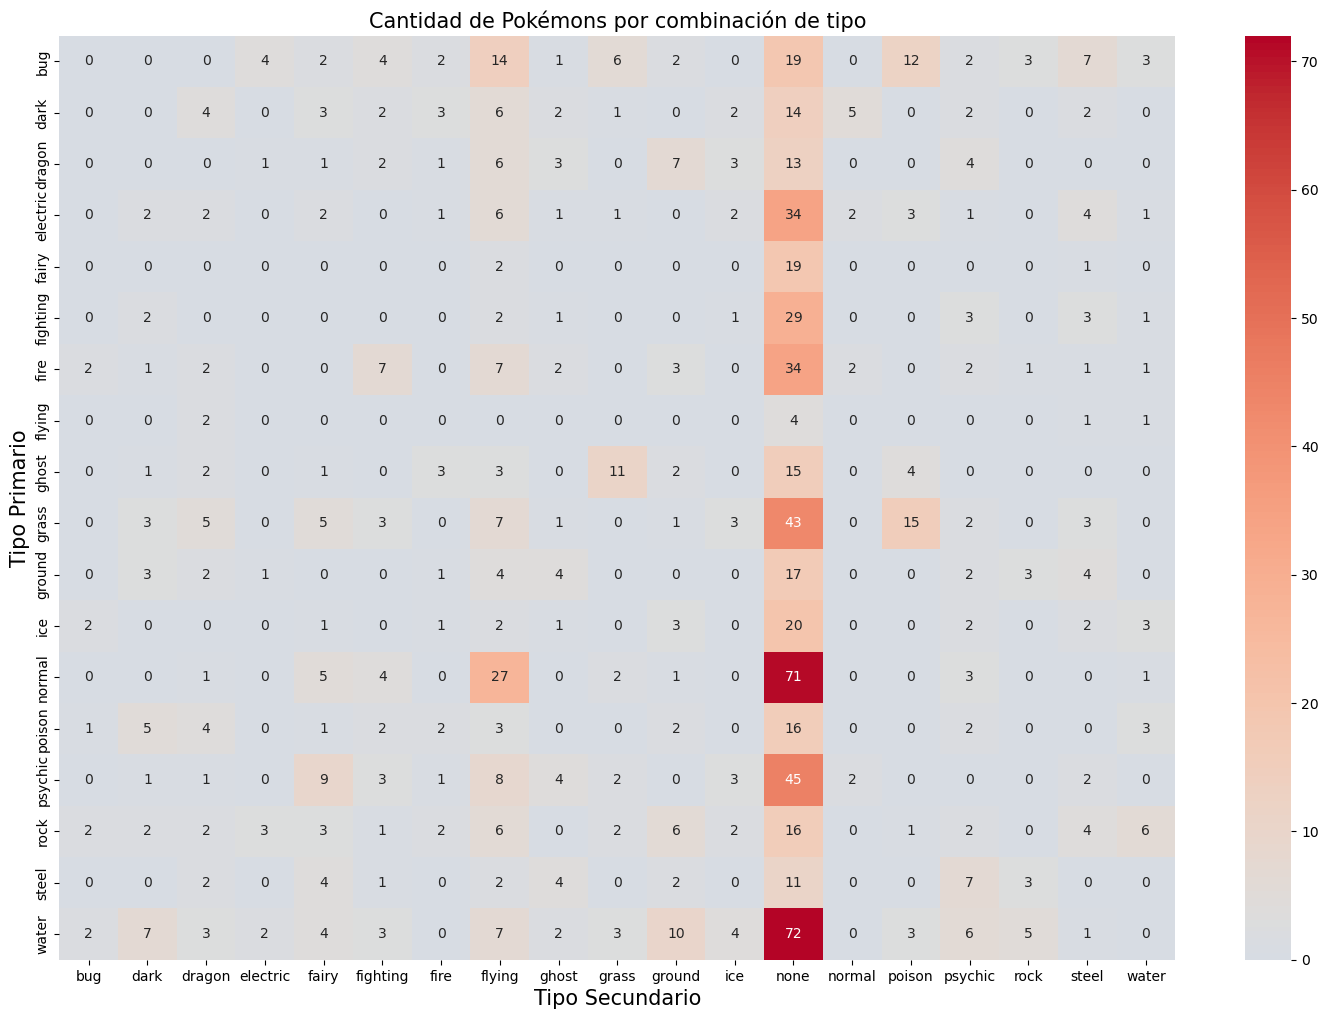

In [69]:
fig, ax = plt.subplots(figsize=(18, 12))

sns.heatmap(contar_tipos,
            cmap='coolwarm',
            annot=True,
            center=contar_tipos.values.mean(),
            ax=ax)


ax.set_title('Cantidad de Pokémons por combinación de tipo', fontsize=15)
ax.set_xlabel('Tipo Secundario', fontsize=15)
ax.set_ylabel('Tipo Primario', fontsize=15)

plt.show()

Se puede concluir que:
    
    * El primer tipo más común es:
Water como tipo primario y sin tipo secundario (none), con 72 Pokémon.

    * El segundo tipo más común es:
Normal como tipo primario y sin tipo secundario (none), con 71 Pokémon.



## ¿Cuántos pokemón legendarios hay en cada generacion?

Utilizando la biblioteca Seaborn se hará un gráfico de conteo categórico que mostrará la cantidad de Pokémon legendarios por generación, excluyendo aquellos con un estado "normal".

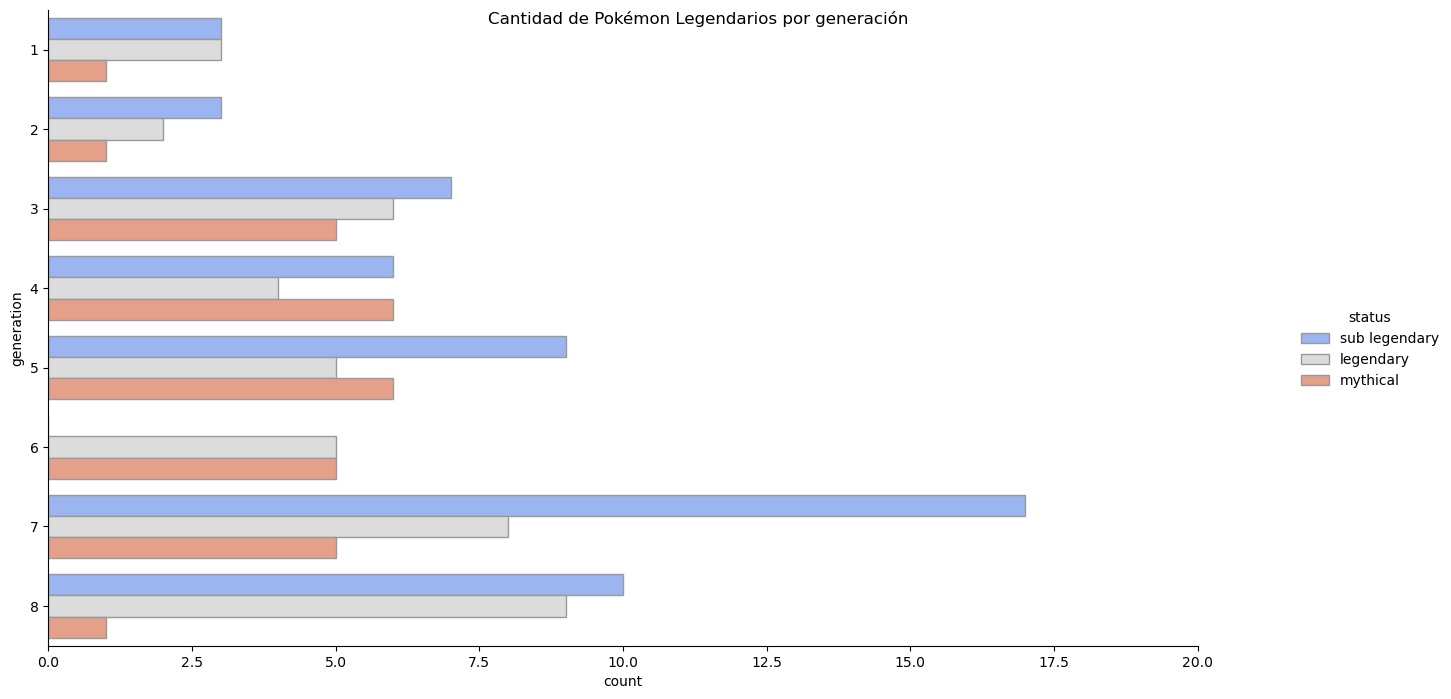

In [70]:
g = sns.catplot(data= df[df['status'] != 'normal'], 
            y= "generation", 
            kind= "count",
            palette= 'coolwarm', 
            edgecolor= "0.6",
            hue= 'status', # Introducir el HUE
            height= 8,
            legend_out = True
               )

g.fig.suptitle('Cantidad de Pokémon Legendarios por generación')
g.fig.set_size_inches(15,7)


g.set(xlim=(0, 20))


plt.show()

Del gráfico se puede desglosar lo siguiente:

- Generación 1 y 2:

  * Tienen pocos Pokémon especiales en total.
  * La mayoría son sub legendary y legendary. Muy pocos mythical (menos de 2).

- Generación 3 y 4:

  * Se incrementa el número de Pokémon especiales.
  * Hay más mythical comparado con generaciones anteriores.
  * La Generación 3 tiene buena presencia de los tres tipos.

- Generación 5 y 7

  * Generación 7 destaca con muchísimos sub legendary (más de 15).
  * Esto muestra que en esa generación se introdujeron más Pokémon de ese subtipo que en cualquier otra.

- Generación 8

  * La cantidad de legendary es igual o superior a sub legendary y solo uno mythical.

## ¿Su poder ha ido cambiando por generaciones?

Para definir el poder de un pokemón, se puede definir cómo la suma de todas sus características. A sí que se creará una nueva columna en el DataFrame, haciendo esta suma:

In [71]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'percentage_male', 'weight_kg'],
      dtype='object')

In [72]:
#Definiendo las columnas de estadísticas
stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']

In [73]:
#Calculando la suma total de estadísticas de los Pokémon
df['total'] = df[stat_columns].sum(axis=1)

In [74]:
#Columna con el total de estadísticas
df['total']

0       318
1       405
2       525
3       625
4       309
       ... 
1040    580
1041    580
1042    500
1043    680
1044    680
Name: total, Length: 1045, dtype: int64

Se usará un boxplot que compare los stats de los pokémon por distintas generaciones, para ver cuál es la más poderosa.

Text(0.5, 0.98, 'Poder de los Pokémon por generación')

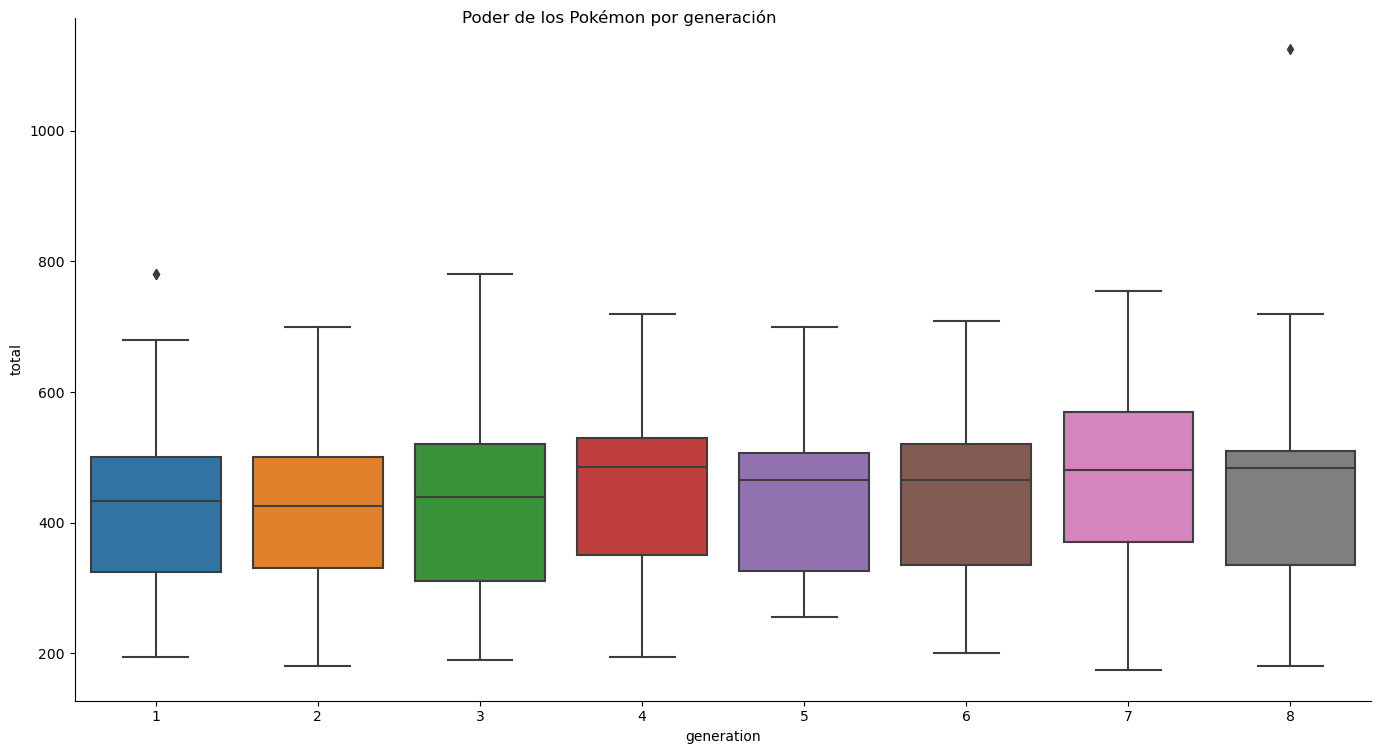

In [75]:
g = sns.catplot( data = df,
                 x = 'generation',
                 y = 'total',
                 kind = 'box'
               )

g.fig.set_size_inches(16, 8)

g.fig.suptitle('Poder de los Pokémon por generación')

Se puede desglosar lo siguiente:

- Generaciones 4 y 7:
Estas generaciones tienen las medianas más altas, lo que indica que, en promedio, 
los Pokémon eran más fuertes que en otras generaciones.

- Generaciones 1, 2 y 3:
Las primeras tres generaciones muestran una mediana ligeramente más baja, 
que podría indicar que los Pokémon eran más balanceados o con menos poder total en promedio.

- Outliers destacados:
Se observan Pokémon con poderes excepcionales en varias generaciones, especialmente en la 1 y la 7.
Estos podrían ser legendarios o Pokémon especiales.

Finalmente, se puede concluir que, aunque la mediana y la dispersión cambian generación tras generación,
no hay un crecimiento sostenido o decreciente claro en el poder total; 

## ¿Qué tipo de pokémon es el más poderoso? Y el menos poderoso?

Con la columna 'Total', se puede hacer gráfico de barras para ver las diferencias.

In [76]:
df['total']

0       318
1       405
2       525
3       625
4       309
       ... 
1040    580
1041    580
1042    500
1043    680
1044    680
Name: total, Length: 1045, dtype: int64

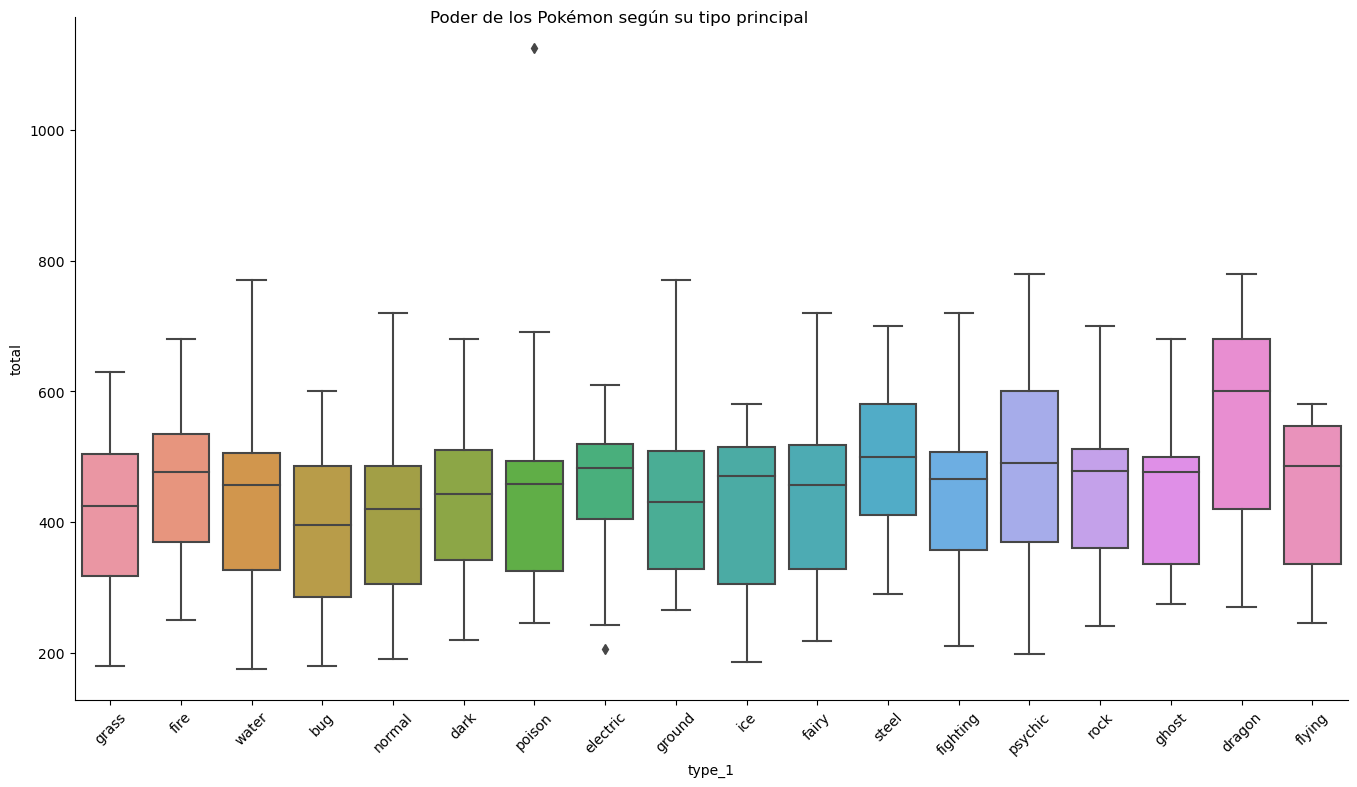

In [77]:
g = sns.catplot( 
    data = df,
    x = 'type_1',
    y = 'total',
    kind = 'box'
)

g.fig.set_size_inches(16, 8)
g.fig.suptitle('Poder de los Pokémon según su tipo principal')
plt.xticks(rotation=45)  
plt.show()

In [78]:
data = df.groupby('type_1')['total'].mean().sort_values(ascending=False)

print(f"El tipo de Pokémon más poderoso en promedio es: {data.idxmax()} con un poder promedio de {data.max():.2f}")
print(f"El tipo de Pokémon menos poderoso en promedio es: {data.idxmin()} con un poder promedio de {data.min():.2f}")

El tipo de Pokémon más poderoso en promedio es: dragon con un poder promedio de 536.37
El tipo de Pokémon menos poderoso en promedio es: bug con un poder promedio de 384.62


## ¿Cuáles son los pokémon más grandes? Y los más pesados? Y cuáles son menos densos?

### ¿Cuáles son los pokémon más grandes?

In [79]:
# Ordena de mayor a menor la altura y muestra los 5 más altos
top5_mas_grandes = df.sort_values(by='height_m', ascending=False)[['name', 'height_m']].set_index('name').head(5).squeeze()

print("Los 5 Pokémon más grandes son:\n")
print(top5_mas_grandes)

Los 5 Pokémon más grandes son:

name
Eternatus Eternamax    100.0
Eternatus               20.0
Wailord                 14.5
Alolan Exeggutor        10.9
Mega Rayquaza           10.8
Name: height_m, dtype: float64


### ¿Cuáles son los pokémon más pesados?

In [80]:
# Ordena el DataFrame por Peso y muestra los 5 más pesados
top5_mas_pesados = df.sort_values(by='weight_kg', ascending=False)[['name', 'weight_kg']].set_index('name').head(5).squeeze()

print("\nLos 5 Pokémon más pesados son:\n")
print(top5_mas_pesados)


Los 5 Pokémon más pesados son:

name
Celesteela             999.9
Cosmoem                999.9
Primal Groudon         999.7
Eternatus Eternamax    950.0
Groudon                950.0
Name: weight_kg, dtype: float64


### ¿Cuáles son los pokémon menos densos?

In [81]:
# Calculando el índice de masa corporal (BMI) de cada Pokémon
df['BMI'] = df['weight_kg'] / df['height_m']

# Ordena los Pokémon por BMI en orden ascendente para encontrar los menos densos
top5_menos_densos = df.sort_values(by='BMI', ascending=True)[['name', 'BMI']].set_index('name').head(5).squeeze()

print("\nTop 5 Pokémon menos densos:")
print(top5_menos_densos)


Top 5 Pokémon menos densos:
name
Haunter    0.062500
Gastly     0.076923
Kartana    0.333333
Cursola    0.400000
Cosmog     0.500000
Name: BMI, dtype: float64


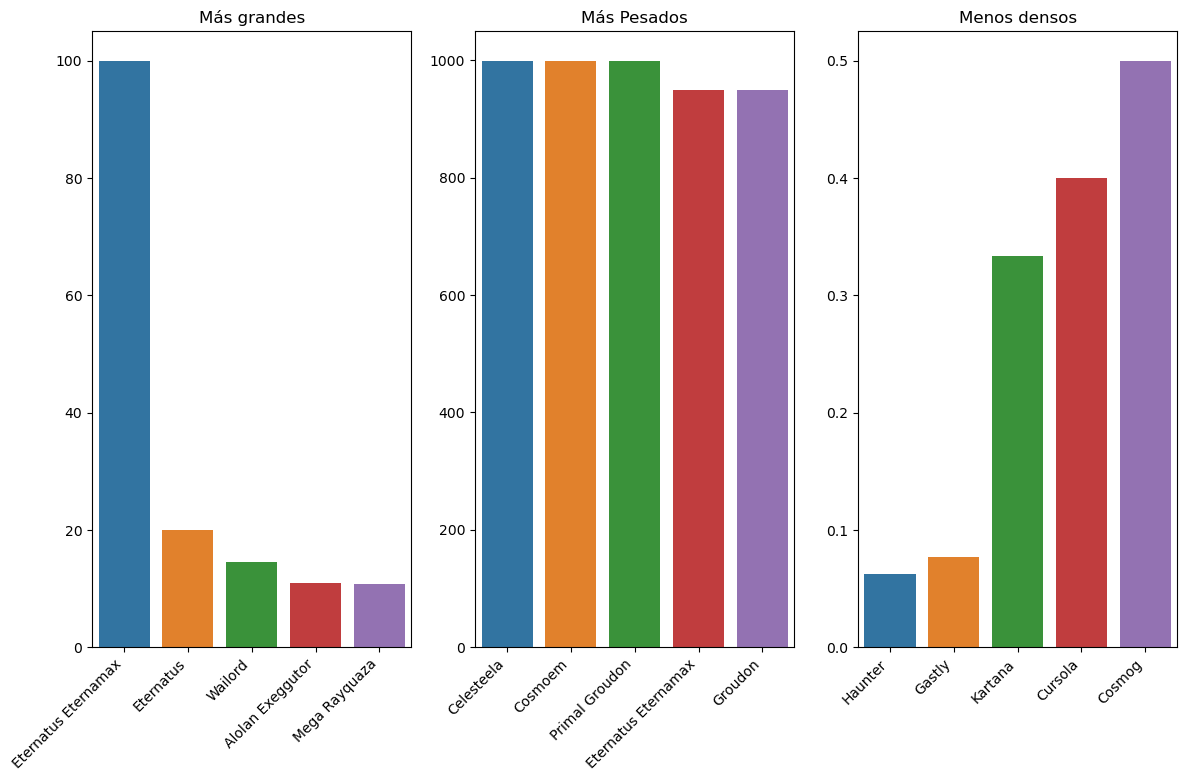

In [82]:
# 3 gráficos de barra con los resultados
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 8), sharey=False, sharex=False)

# Gráfico de barras para los Pokémon más grandes
sns.barplot(ax=ax1, x=top5_mas_grandes.index, y=top5_mas_grandes.values)
ax1.set_title('Más grandes')
ax1.set_xticklabels(ax1.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
ax1.set(xlabel=None)

# Gráfico de barras para los Pokémon más pesados
sns.barplot(ax=ax2, x=top5_mas_pesados.index, y=top5_mas_pesados.values)
ax2.set_title('Más Pesados')
ax2.set_xticklabels(ax2.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
ax2.set(xlabel=None)

# Gráfico de barras para los Pokémon menos densos
sns.barplot(ax=ax3, x=top5_menos_densos.index, y=top5_menos_densos.values)
ax3.set_title('Menos densos')
ax3.set_xticklabels(ax3.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
ax3.set(xlabel=None)

plt.show()

## ¿Qué porcentaje de Pokémon son hembras y machos?

In [83]:
#Calcular el porcentaje de Pokémon que son hembras
df['percentage_female'] = 100 - df['percentage_male']

# Promedio de pokémon hembras y machos
femenino_promedio = df['percentage_female'].mean()
print(f"El porcentaje promedio de pokémon hembras es de: {femenino_promedio:.2f}%")
masculino_promedio= df['percentage_male'].mean()
print(f"El porcentaje promedio de pokémon machos es de: {masculino_promedio:.2f}%")

El porcentaje promedio de pokémon hembras es de: 54.21%
El porcentaje promedio de pokémon machos es de: 45.79%


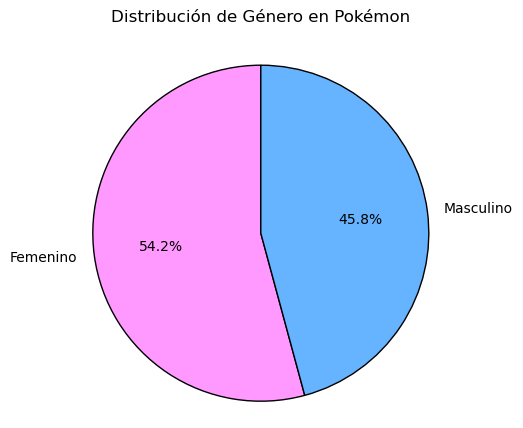

In [84]:
labels = ['Femenino', 'Masculino']
sizes = [femenino_promedio, masculino_promedio]
colors = ['#ff99ff', '#66b3ff']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax.axis('equal')  # Asegura que el gráfico de pie sea circular
plt.title('Distribución de Género en Pokémon', y=1.05)
plt.show()

## ¿Qué Pokémon tienen más defensa que ataque y viceversa?

In [93]:
#Todas las columnas
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'percentage_male', 'weight_kg', 'total', 'BMI',
       'percentage_female'],
      dtype='object')

In [94]:
# Pokémon con más defensa que ataque
defensivos = df[df['defense'] > df['attack']].head(5).squeeze()

print("Pokémon con más defensa que ataque:")
print(defensivos[['name', 'defense', 'attack']])

# Pokémon con más ataque que defensa
ofensivos = df[df['attack'] > df['defense']].head(5).squeeze()

print("\nPokémon con más ataque que defensa:")
print(ofensivos[['name', 'attack', 'defense']])

Pokémon con más defensa que ataque:
             name  defense  attack
1         Ivysaur       63      62
2        Venusaur       83      82
3   Mega Venusaur      123     100
9        Squirtle       65      48
10      Wartortle       80      63

Pokémon con más ataque que defensa:
               name  attack  defense
4        Charmander      52       43
5        Charmeleon      64       58
6         Charizard      84       78
7  Mega Charizard X     130      111
8  Mega Charizard Y     104       78
